In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/jihun/4255/OpensourceHW/pkl_result/train/window_200',
    target_size=(400, 400),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    'C:/Users/jihun/4255/OpensourceHW/pkl_result/train/window_200',
    target_size=(400, 400),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

Found 39833 images belonging to 2 classes.
Found 4425 images belonging to 2 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,5, activation = "relu", input_shape=[400,400,3]),
    tf.keras.layers.Conv2D(64,5, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 396, 396, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 392, 392, 64)      51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 196, 196, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 614656)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1229314   
Total params: 1,283,010
Trainable params: 1,283,010
Non-trainable params: 0
______________________________________________

In [12]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [14]:
history = model.fit(train_generator, epochs=20, verbose=1, validation_data=validation_generator)

Epoch 1/20
2490/2490 [==============================] - 247s 99ms/step - loss: 0.1591 - accuracy: 0.9405 - val_loss: 0.6383 - val_accuracy: 0.8070
Epoch 2/20
2490/2490 [==============================] - 247s 99ms/step - loss: 0.0814 - accuracy: 0.9738 - val_loss: 0.6498 - val_accuracy: 0.7968
Epoch 3/20
2490/2490 [==============================] - 247s 99ms/step - loss: 0.0501 - accuracy: 0.9841 - val_loss: 0.6917 - val_accuracy: 0.8025
Epoch 4/20
2490/2490 [==============================] - 247s 99ms/step - loss: 0.0333 - accuracy: 0.9892 - val_loss: 0.8112 - val_accuracy: 0.7957
Epoch 5/20
2490/2490 [==============================] - 247s 99ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.8047 - val_accuracy: 0.7799
Epoch 6/20
2490/2490 [==============================] - 246s 99ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 1.0714 - val_accuracy: 0.7704
Epoch 7/20
2490/2490 [==============================] - 246s 99ms/step - loss: 0.0105 - accuracy: 0.9964 - val_loss: 1

In [20]:
val_acc

[0.8070056438446045,
 0.7968361377716064,
 0.8024858832359314,
 0.7957062125205994,
 0.7798870205879211,
 0.7703954577445984,
 0.7502824664115906,
 0.7868926525115967,
 0.7776271104812622,
 0.8013559579849243,
 0.7749152779579163,
 0.7812429666519165,
 0.7803390026092529,
 0.800000011920929,
 0.7778531312942505,
 0.7945762872695923,
 0.7880225777626038,
 0.7728813290596008,
 0.7810169458389282,
 0.7920904159545898]

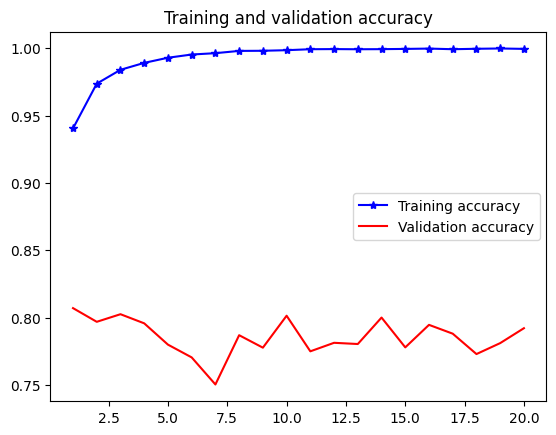

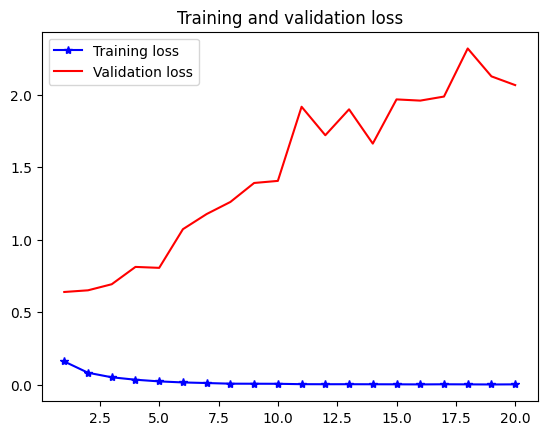

In [15]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b*-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'b*-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

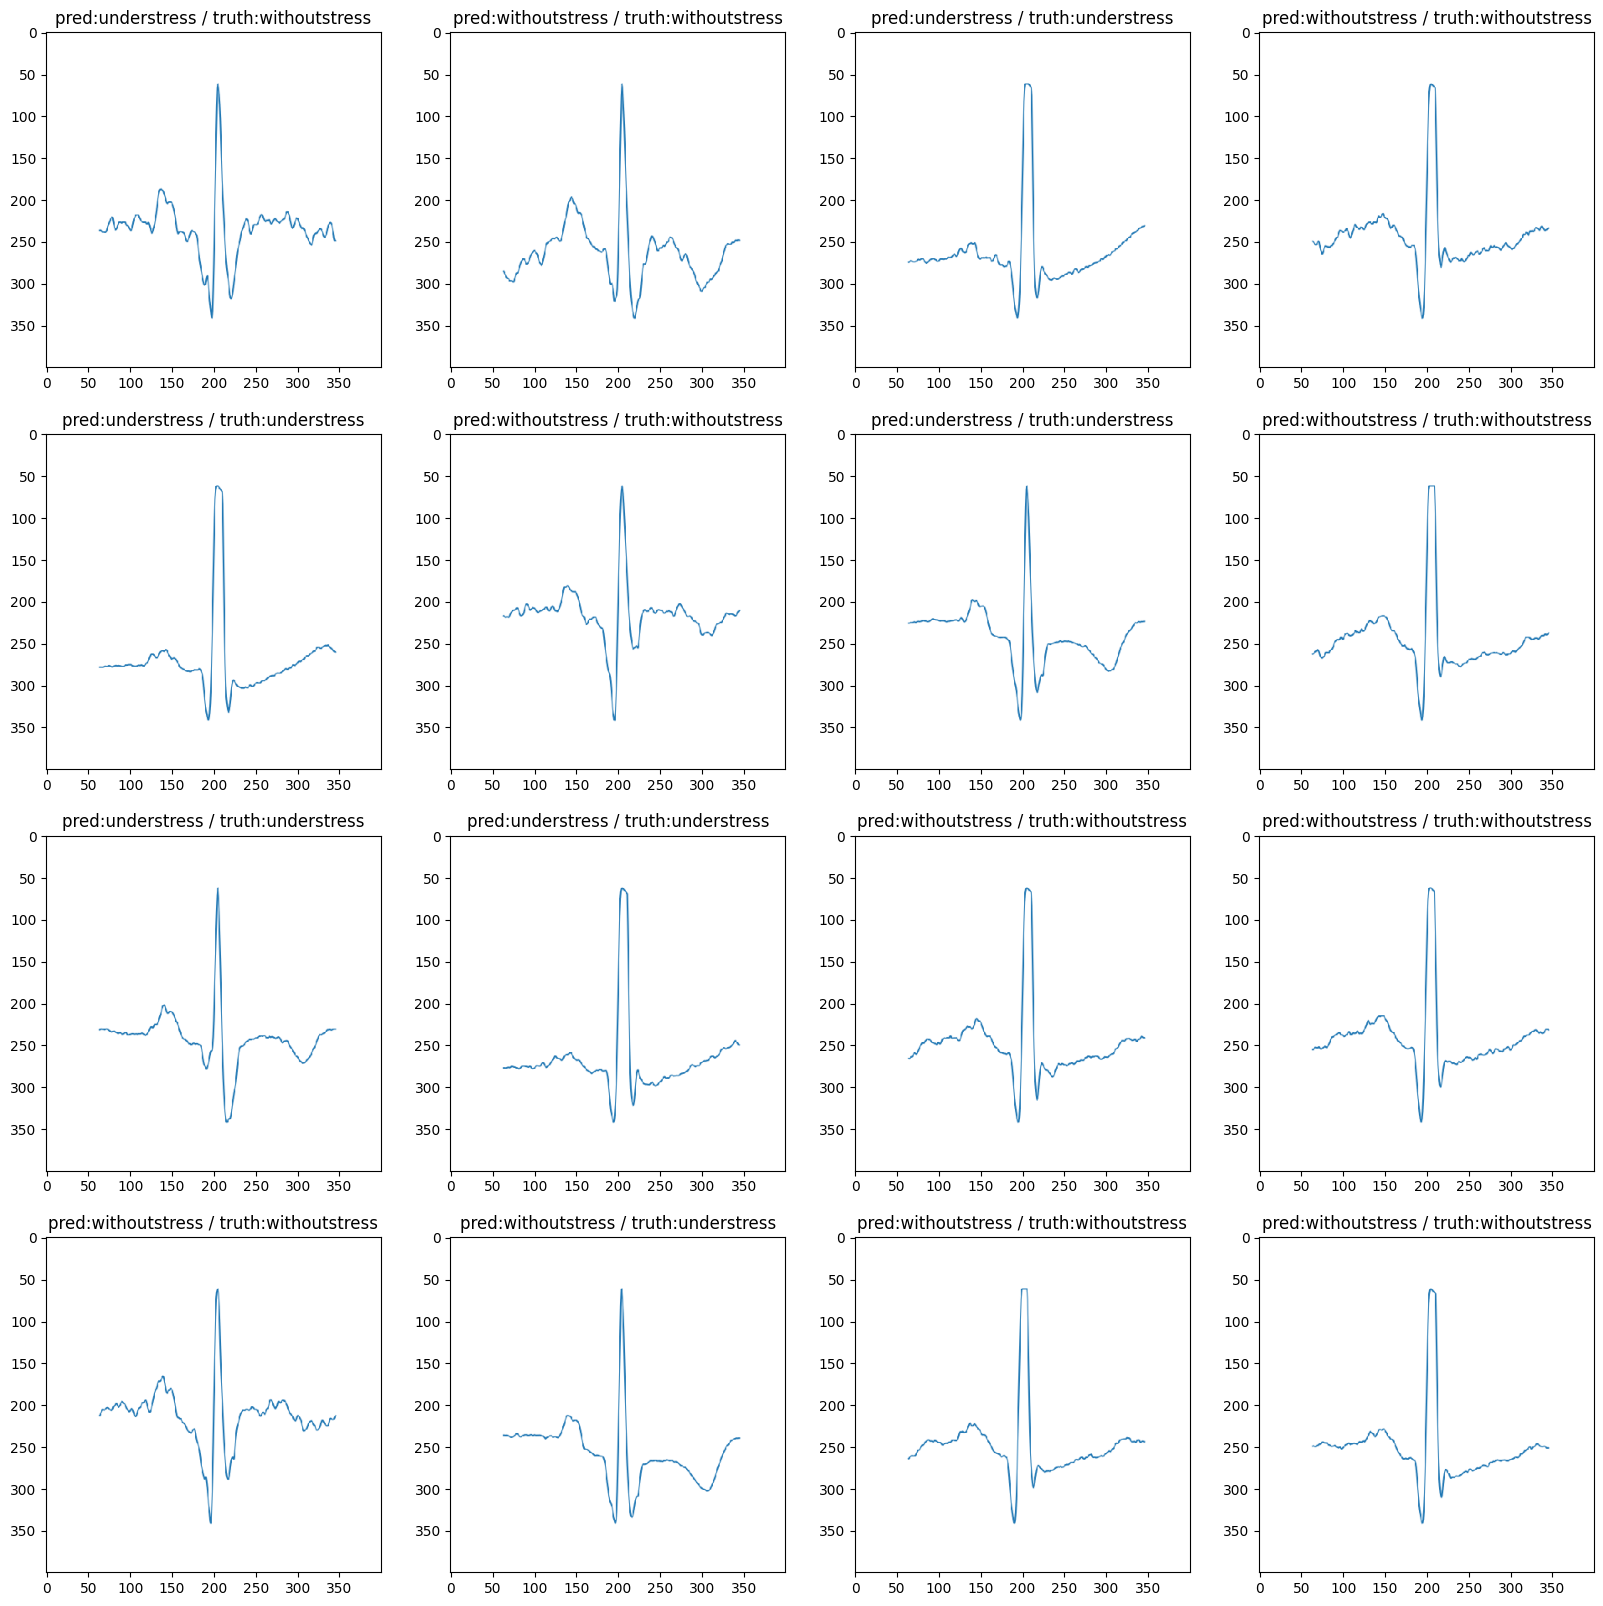

In [16]:
test_x, test_y = validation_generator.__getitem__(1)
preds = model.predict(test_x)
labels =['understress', 'withoutstress']
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

In [18]:
# 이미지 경로 설정
test_data_dir = 'C:/Users/jihun/4255/OpensourceHW/pkl_result/test'

# 이미지 데이터 전처리
test_data_generator = ImageDataGenerator(rescale=1./255)  # 이미지 정규화
test_data = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(400, 500),  # 이미지 크기 조정
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)
# 테스트 데이터 예측
predictions = model.predict(test_data)

Found 2600 images belonging to 2 classes.


InvalidArgumentError:  Input to reshape is a tensor with 12343296 values, but the requested shape requires a multiple of 614656
	 [[node sequential_2/flatten_2/Reshape (defined at Users\jihun\AppData\Local\Temp\ipykernel_18912\3897872670.py:14) ]] [Op:__inference_predict_function_168436]

Function call stack:
predict_function


In [ ]:
class_labels= test_data.class_indices
print(class_labels)

y_true = test_data.labels
y_pred = predictions > 0.5

In [111]:
threshold = 0.5
y_pred = np.where(y_pred[:,1] >= threshold, 1,0)
print(y_pred)

[1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 

In [113]:
metric = tf.keras.metrics.BinaryAccuracy()
accuracy = metric(y_true, y_pred)
print(accuracy)

tf.Tensor(0.5530381, shape=(), dtype=float32)


In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = tf.keras.metrics.accuracy_score(y_true, y_pred)
precision = tf.keras.metrics.precision_score(y_true, y_pred)
recall = tf.keras.metrics.recall_score(y_true, y_pred)
print('정확도 = ', accuracy, '정밀도 =', precision, '재현율 =', recall )

AttributeError: module 'keras.api._v2.keras.metrics' has no attribute 'accuracy_score'

In [114]:
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
tf.Tensor(
[[376 123]
 [311 161]], shape=(2, 2), dtype=int32)
